# Mark-Recapture

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


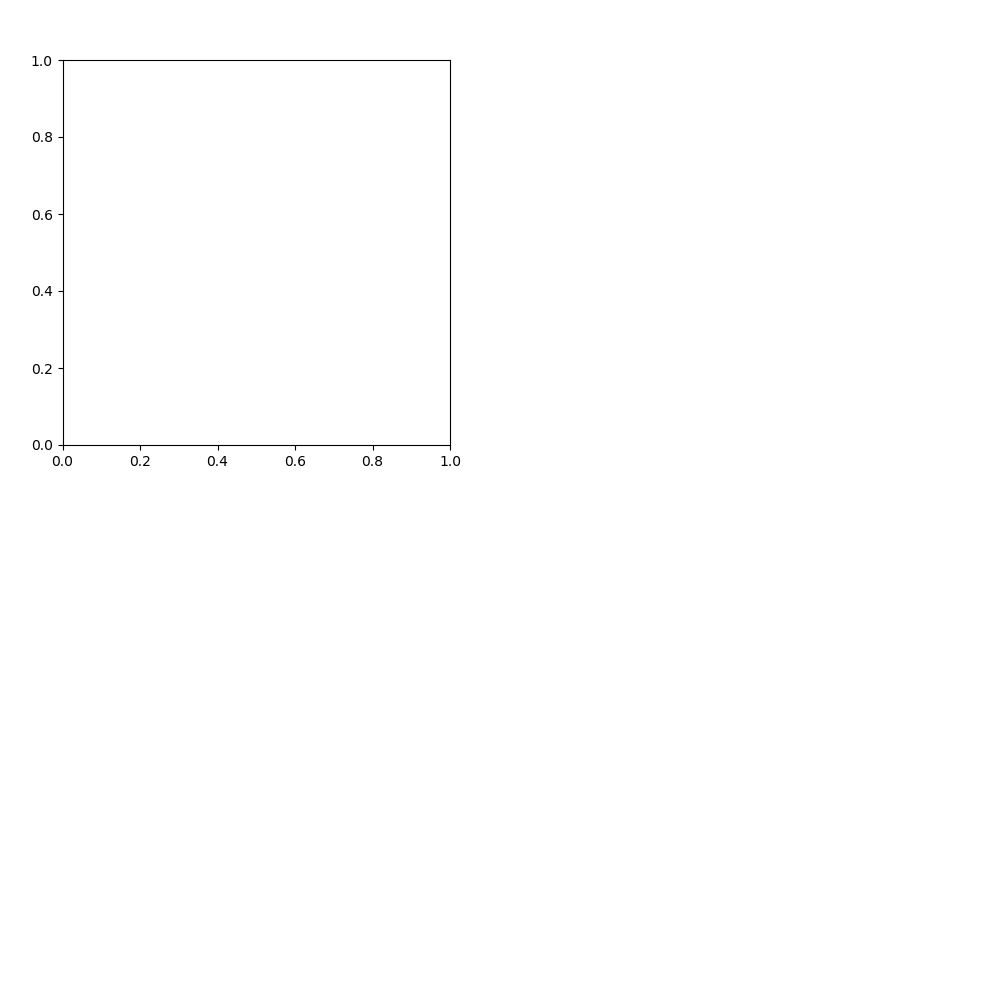

TypeError: data type not understood

In [23]:
#MARK AND RECAPTURE
%matplotlib notebook

nanimals = 100
nsteps = 1000
vmin = 0.01
vmax = 0.05
trapsize = 0.4 #All critters with x and y values below this will be "captured"

x = np.random.uniform(size=nanimals)
y = np.random.uniform(size=nanimals)
vx = np.random.uniform(size=nanimals,low=vmin,high=vmax,) * (2*np.random.randint(size=nanimals,low=0,high=2)-1)
vy = np.random.uniform(size=nanimals,low=vmin,high=vmax,) * (2*np.random.randint(size=nanimals,low=0,high=2)-1)

#Capture
color = np.where(np.logical_and(x<trapsize,y<trapsize),1,0)
estimation = np.zeros(nsteps) #@Every time point, remember the estimation of n 
n_marked = np.sum(color)

#Plotting
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(nsteps):
    x+=vx
    y+=vy
    
    vx = np.where(np.logical_or(x>1,x<0),-vx,vx)
    vy = np.where(np.logical_or(y>1,y<0),-vy,vy)
    
    #Recapture
    n_recaptured_total = np.sum(np.logical_and(x<trapsize,y<trapsize),1,0)
    n_recaptured_marked = (np.sum(np.logical_and(x<trapsize,y<trapsize)) * color)
    estimation[t] = ((n_marked+1) / (n_recaptured_marked+1) * n_recaptured_total)-1
   
    ax.clear()
    plt.plot((x[color==0],y[color==0]),'k.',markersize=4);
    plt.plot((x[color==1],y[color==1]),'r.',markersize=4);
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() # <--------------- The main command to make it move
    #time.sleep(0.05)
                                 
plt.figure();
plt.plot(estimation);                           